##### Third party imports

In [1]:
from PIL import Image

import torch
import numpy as np
import platform

from torchvision import transforms

import matplotlib.pyplot as plt
from IPython.display import display 

import warnings
warnings.filterwarnings('ignore')

___

##### Inpaint package imports

In [2]:
from inpaint.data import PlacesDataset
from inpaint.utils import random_ff_mask, random_bbox_mask, denorm

___

In [3]:
path = "../samples/Places365"
if platform.system().lower() == 'windows':
    path = "..\samples\Places365"

##### Initialize Places dataset

In [4]:
dataset = PlacesDataset(path_dir = path, transform_config=('to_tensor', 'random_crop', 'norm'), crop_size=(384,384))

print("Total images:", len(dataset))
dataset[0].shape

Total images: 24


torch.Size([3, 384, 384])

##### Visualize Free form masks

img_shape =  torch.Size([3, 384, 384])
mask_shape =  (1, 384, 384)
masked_img shape =  torch.Size([3, 384, 384])


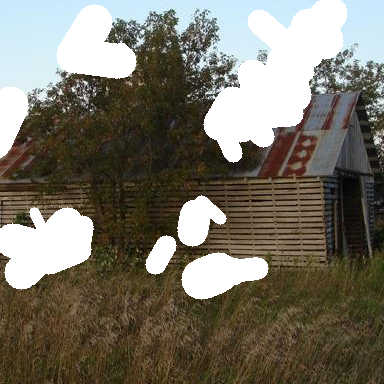

In [5]:
%matplotlib inline

# for index, path in enumerate(image_lst):

img = dataset[10]
C, H, W = img.shape

mask =  random_ff_mask(shape = (H, W), max_angle=10, max_len=40, max_width=30, times=20)

print("img_shape = ", img.shape)
print("mask_shape = ",mask.shape)

img = denorm(img)
masked_img = img * (1 - mask) + mask

print("masked_img shape = ",masked_img.shape) 

trans = transforms.ToPILImage()

display(trans(masked_img))

In [6]:
mask = np.concatenate((mask, mask, mask), 0)
mask = np.transpose(mask, (1,2,0))
mask.shape

(384, 384, 3)

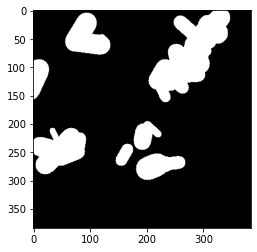

In [7]:
plt.imshow(mask)

____

##### Visualize box mask

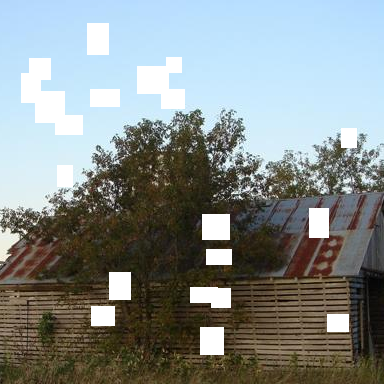

In [8]:
%matplotlib inline

img = dataset[10]
C, H, W = img.shape

mask =  random_bbox_mask(shape = (H, W), margin=(10,10), bbox_shape=(40,40), times=20)

img = denorm(img)
masked_img = img * (1 - mask) + mask

trans = transforms.ToPILImage()

display(trans(masked_img))
